In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.optimize as fit 


#plz run the whole code at once since I got lazy and kept using the same variable name when curve fitting multiple times.  

# load data of exoplanets and remove unnecessary columns 
df = pd.read_csv("exoplanets.csv")
df.drop(["pl_radeerr1", "pl_radeerr2", "pl_radelim", "pl_radjerr1", "pl_radjerr2", "pl_radjlim", "pl_bmasseerr1", "pl_bmasseerr2", "pl_bmasselim",
        "pl_bmassjerr1", "pl_bmassjerr2", "pl_bmassjlim"], axis=1, inplace=True)
df.rename(columns={"pl_rade": "earth_radius", "pl_radj": "jupiter_radius", "pl_bmasse": "earth_mass", "pl_bmassj": "jupiter_mass"}, inplace=True)

In [18]:
#Convert Units
df["earth_mass(g)"]=df["earth_mass"]*5.972e27
df["earth_radius(cm)"]=df["earth_radius"]*6.378e8

#Calculate Denisty 
density=df["earth_mass(g)"]/((4/3)*np.pi*df["earth_radius(cm)"]**3)
df["density"]=density

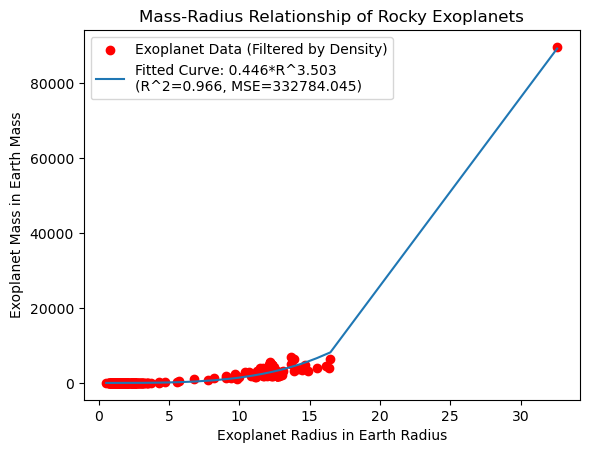

In [19]:
#Filter by Denisty 
df1=df[df["density"]>5]
    #Calculate IQR
Q1 = df1["density"].quantile(0.25)
Q3 = df1["density"].quantile(0.75)
IQR = Q3 - Q1

    #Identify Outliers
lower_outlier = df1[df1["density"] < Q1 - (1.5 * IQR)]
higher_outlier=df1[df1["density"] > Q3 + (1.5 * IQR)]

    #Remove Outlier 
df1 = df1.drop(lower_outlier.index)
df1 = df1.drop(higher_outlier.index)

#Curve Fitting of Filtered Data by Density 
x=df1["earth_radius"]
y=df1["earth_mass"]
def power(x, a, b):
    return a*(x**b)
par,  cov = fit.curve_fit(power, (x), (y))
a=par[0]
b=par[1]
y1=power((x), *par)

#Calculate MSE 
mse_value=np.mean((y-y1)**2)
#Calculate r^2
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y1)**2)
r_squared = 1 - (ss_res / ss_tot)

#plotting
plt.figure()
plt.scatter((x),(y), color="red", label="Exoplanet Data (Filtered by Density)")
plt.plot((np.sort((x))),np.sort(y1), label= f"Fitted Curve: {a:.3f}*R^{b:.3f}\n(R^2={r_squared:.3f}, MSE={mse_value:.3f})")
plt.xlabel("Exoplanet Radius in Earth Radius")
plt.ylabel("Exoplanet Mass in Earth Mass")
plt.title("Mass-Radius Relationship of Rocky Exoplanets")
plt.legend()
plt.show()


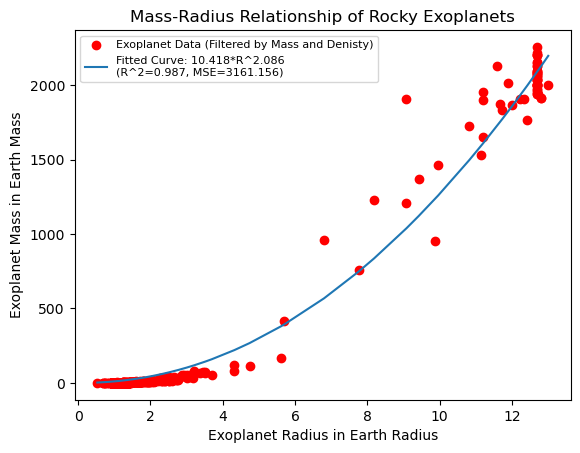

In [20]:
#Filter by Mass

    #Calculate IQR
Q1 = df1["earth_mass"].quantile(0.25)
Q3 = df1["earth_mass"].quantile(0.75)
IQR = Q3 - Q1

    #Identify Outliers
lower_outlier = df1[df1["earth_mass"] < Q1 - (1.5 * IQR)]
higher_outlier=df1[df1["earth_mass"] > Q3 + (1.5 * IQR)]

    #Remove Outlier 
df1 = df1.drop(lower_outlier.index)
df1 = df1.drop(higher_outlier.index)

#Curve Fitting of Filtered Data by Density and Mass
x=df1["earth_radius"]
y=df1["earth_mass"]
def power(x, a, b):
    return a*(x**b)
par,  cov = fit.curve_fit(power, (x), (y))
a=par[0]
b=par[1]
y1=power((x), *par)

#Calculate MSE 
mse_value=np.mean((y-y1)**2)
#Calculate r^2
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y1)**2)
r_squared = 1 - (ss_res / ss_tot)


#plotting
plt.figure()
plt.scatter((x),(y), color="red", label="Exoplanet Data (Filtered by Mass and Denisty)")
plt.plot((np.sort((x))),np.sort(y1), label= f"Fitted Curve: {a:.3f}*R^{b:.3f}\n(R^2={r_squared:.3f}, MSE={mse_value:.3f})" )
plt.xlabel("Exoplanet Radius in Earth Radius")
plt.ylabel("Exoplanet Mass in Earth Mass")
plt.title("Mass-Radius Relationship of Rocky Exoplanets")
plt.legend(prop={"size": 8})
plt.show()



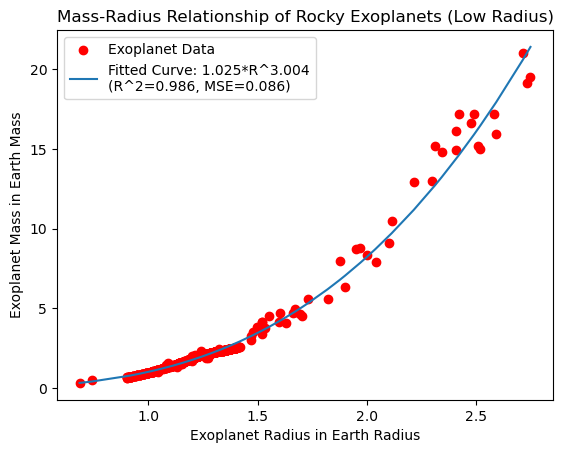

In [21]:
# Divide Data into 2 parts 
df_lower=df1[x<3]
df_higher=df1[x>6]

#Remove the outliers by Density 
#Lower Data
    #Calculate IQR
Q1 = df_lower["density"].quantile(0.25)
Q3 = df_lower["density"].quantile(0.75)
IQR = Q3 - Q1
    #Identify Outliers
lower_outlier = df_lower[df_lower["density"] < Q1 - (1.5 * IQR)]
higher_outlier=df_lower[df_lower["density"] > Q3 + (1.5 * IQR)]
    #Remove Outlier 
df_lower = df_lower.drop(lower_outlier.index)
df_lower = df_lower.drop(higher_outlier.index)


#Higher Data
    #Calculate IQR
Q1 = df_higher["density"].quantile(0.25)
Q3 = df_higher["density"].quantile(0.75)
IQR = Q3 - Q1
    #Identify Outliers
lower_outlier = df_higher[df_higher["density"] < Q1 - (1.5 * IQR)]
higher_outlier=df_higher[df_higher["density"] > Q3 + (1.5 * IQR)]
    #Remove Outlier 
df_higher = df_higher.drop(lower_outlier.index)
df_higher = df_higher.drop(higher_outlier.index)


#Curve Fit lower half
x=df_lower["earth_radius"]
y=df_lower["earth_mass"]
par,  cov = fit.curve_fit(power, (x), (y))
a=par[0]
b=par[1]
y1=power((x), *par)


#Calculate MSE 
mse_value=np.mean((y-y1)**2)
#Calculate r^2
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y1)**2)
r_squared = 1 - (ss_res / ss_tot)


#plotting
plt.figure()
plt.scatter((x),(y), color="red", label="Exoplanet Data")
plt.plot((np.sort((x))),np.sort(y1),label= f"Fitted Curve: {a:.3f}*R^{b:.3f}\n(R^2={r_squared:.3f}, MSE={mse_value:.3f})")
plt.xlabel("Exoplanet Radius in Earth Radius")
plt.ylabel("Exoplanet Mass in Earth Mass")
plt.title("Mass-Radius Relationship of Rocky Exoplanets (Low Radius)")
plt.legend()
plt.show()


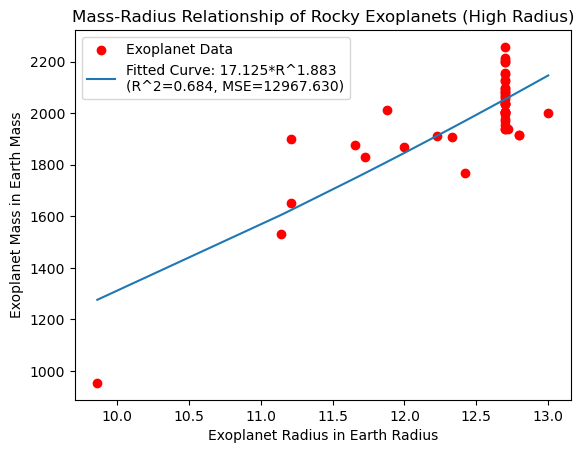

In [22]:
#Curve Fit higher half
x=df_higher["earth_radius"]
y=df_higher["earth_mass"]
def power(x, a, b):
    return a*(x**b)
par,  cov = fit.curve_fit(power, (x), (y))
a=par[0]
b=par[1]
y1=power((x), *par)


#Calculate MSE 
mse_value=np.mean((y-y1)**2)
#Calculate r^2
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y1)**2)
r_squared = 1 - (ss_res / ss_tot)


#plotting
plt.figure()
plt.xlim=(12.6,12.8)
plt.scatter((x),(y), color="red", label="Exoplanet Data")
plt.plot((np.sort((x))),np.sort(y1), label= f"Fitted Curve: {a:.3f}*R^{b:.3f}\n(R^2={r_squared:.3f}, MSE={mse_value:.3f})" ) 
plt.xlabel("Exoplanet Radius in Earth Radius")
plt.ylabel("Exoplanet Mass in Earth Mass")
plt.title("Mass-Radius Relationship of Rocky Exoplanets (High Radius)")
plt.legend()
plt.show()


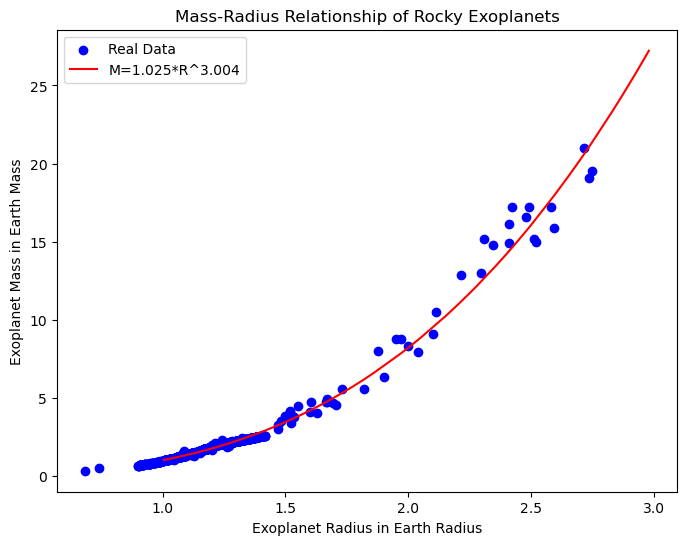

In [23]:
#Random Data Test
x=df_lower["earth_radius"]
y=df_lower["earth_mass"]
random_radius= np.sort(np.random.uniform(1, 3, 100))
random_mass_estimate=power(random_radius, 1.0249262737607505, 3.004248334608679)


# Plot the generated random data
plt.figure(figsize=(8, 6))
plt.scatter((x),(y), color="blue", label="Real Data")
plt.plot(random_radius,np.sort(random_mass_estimate), color="red", label=f"M=1.025*R^3.004")
plt.xlabel("Exoplanet Radius in Earth Radius")
plt.ylabel("Exoplanet Mass in Earth Mass")
plt.title("Mass-Radius Relationship of Rocky Exoplanets")
plt.legend()
plt.show()
